## 逻辑回归实例

### 1.引入包

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2.相关准备函数

In [127]:
# 加载数据
def loadData(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions：', data.shape)
    print(data[:5, :])
    return (data)

In [128]:
# 绘制正负样本的散点图
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # 获取正负样本的下标
    neg = data[:, 2] == 0
    pos = data[:, 2] == 1
    
    if axes == None:
        axes = plt.gca()
    # 绘制散点图
    axes.scatter(data[pos][:, 0], data[pos][:, 1], marker='+', c='k', s=60, linewidth=2,label=label_pos)
    axes.scatter(data[neg][:, 0], data[neg][:, 1], marker='x', c='y', s=60, linewidth=2,label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon=True, fancybox = True);

#### 逻辑回归假设
$$
h_{\theta} = g(\theta^Tx)
$$
$$
g(z) = \frac{1}{1+ e^{-z}}
$$

In [129]:
# sigmoid函数
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

#### 损失函数
$$
J(\theta) = \frac{1}{m} \sum_{i=1}^m [-y^{(i)}log(h_\theta(x^{(i)}))-(1-y^{(i)})log(1-h_\theta(x^{(i)}))]
$$
$$
J(\theta) = - \frac{1}{m}\big((log(g(X\theta))^Ty+log(1-g(X\theta))^T(1-y)\big)
$$

##### 正则化
$$
J(\theta) = \frac{1}{m} \sum_{i=1}^m [-y^{(i)}log(h_\theta(x^{(i)}))-(1-y^{(i)})log(1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2
$$
$$
J(\theta) = - \frac{1}{m}\big((log(g(X\theta))^Ty+log(1-g(X\theta))^T(1-y)\big) + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2
$$

In [130]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = (- 1.0 / m) * (np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y))
    
    if np.isnan(J[0]):
        return (np.inf)
    return J[0]

In [170]:
def costFunctionReg(theta, reg, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = (- 1.0 / m) * (np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y)) + (reg / (2 * m)) * np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return (np.inf)
    return J[0]

#### 求偏导
$$
\frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j}
$$
$$
\frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)
$$

##### 正则化
$$
\frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} + \frac{\lambda}{m}\theta_j
$$
$$
\frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y) + \frac{\lambda}{m}\theta_j
$$

注：自己添加的\theta_0不需要被正则化

In [131]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    
    grad = (1.0 / m) * X.T.dot(h-y)
    
    return (grad.flatten())

In [171]:
def gradientReg(theta, reg, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    
    grad = (1.0 / m) * X.T.dot(h-y) + (reg / m) * np.r_[[[0]], theta[1:].reshape(-1, 1)]
    
    return (grad.flatten())

#### 梯度下降

In [132]:
def gradientDescent(theta, X, y, alpha=0.001, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        theta = theta - alpha * gradient(theta, X, y)
        J_history[iter] = costFunction(theta, X, y)
    return (theta, J_history)

#### 预测

In [146]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

#### 画决策边界

### 3.考试通过预测

In [139]:
data = loadData('logistic_regression_data1.txt', ',')

Dimensions： (100, 3)
[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]


In [140]:
X = np.c_[np.ones((data.shape[0], 1)), data[:, :2]]
y = np.c_[data[:, 2]]

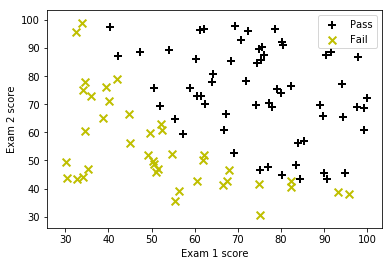

In [136]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Pass', 'Fail')

In [160]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: ', cost)
print('Grad: ', grad)
print(initial_theta)


Cost:  0.6931471805599452
Grad:  [ -0.1        -12.00921659 -11.26284221]
[0. 0. 0.]


theta:  [-0.10400148  0.01114724  0.00125993]
Cost： 0.6225994137274374


Text(0.5,0,'Iterations')

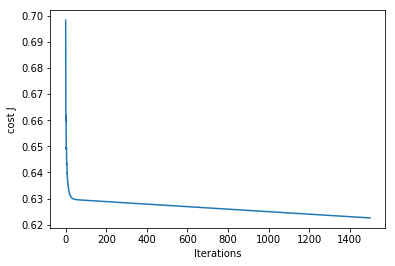

In [142]:
# 自己写的梯度下降
theta, cost_J = gradientDescent(initial_theta, X, y)
print('theta: ', theta.ravel())
print('Cost：', cost_J[-1])

plt.plot(cost_J)
plt.ylabel('cost J')
plt.xlabel('Iterations')

In [145]:
# 使用scipy的minimize函数
from scipy.optimize import minimize
res = minimize(costFunction, initial_theta, args=(X,y), jac=gradient, options={'maxiter':400})
res

D:\programme\Anaconda\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
D:\programme\Anaconda\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


      fun: 0.20349770158950983
 hess_inv: array([[ 2.85339493e+03, -2.32908823e+01, -2.27416470e+01],
       [-2.32908823e+01,  2.04489131e-01,  1.72969525e-01],
       [-2.27416470e+01,  1.72969525e-01,  1.96170322e-01]])
      jac: array([-2.68557631e-09,  4.36433478e-07, -1.39671758e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])

In [156]:
# 考试1得45， 考试2得85
flag = predict(res.x.T, np.array([1, 45, 85]))
p = sigmoid(np.array([1, 45, 85]).dot(res.x.T))
print("是否通过：", flag == 1)
print("通过概率：", p)

是否通过： True
通过概率： 0.7762903249331015


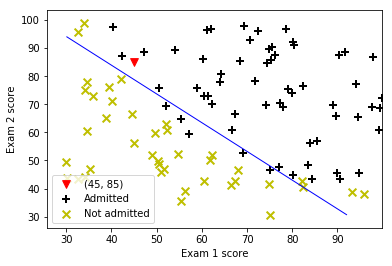

In [162]:
# 画决策边界
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');

### 4.多项式特征逻辑回归

In [164]:
data2 = loadData('logistic_regression_data2.txt', ',')

Dimensions： (118, 3)
[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]]


In [165]:
X = data2[:, :2]
y = np.c_[data2[:, 2]]

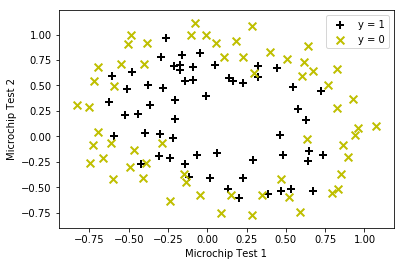

In [166]:
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [175]:
#  添加多项式
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
XX = poly.fit_transform(X)
XX.shape

(118, 28)

In [172]:
initial_theta = np.zeros(XX.shape[1])
costFunctionReg(initial_theta, 1, XX, y)

0.6931471805599453

D:\programme\Anaconda\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


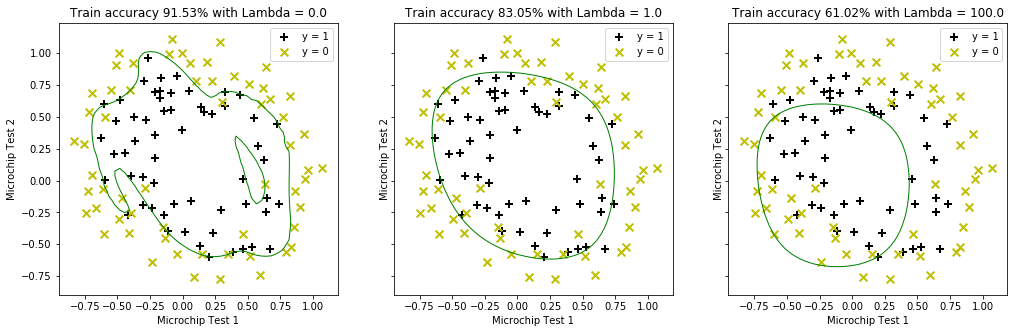

In [176]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# 决策边界，咱们分别来看看正则化系数lambda太大太小分别会出现什么情况
# Lambda = 0 : 就是没有正则化，这样的话，就过拟合咯
# Lambda = 1 : 这才是正确的打开方式
# Lambda = 100 : 卧槽，正则化项太激进，导致基本就没拟合出决策边界

for i, C in enumerate([0.0, 1.0, 100.0]):
    # 最优化 costFunctionReg
    res2 = minimize(costFunctionReg, initial_theta, args=(C, XX, y), jac=gradientReg, options={'maxiter':3000})
    
    # 准确率
    accuracy = 100.0*sum(predict(res2.x, XX) == y.ravel())/y.size    

    # 对X,y的散列绘图
    plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    
    # 画出决策边界
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))